In [1]:
%matplotlib inline
#%matplotlib
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import parse_xmf
import column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt

Visualize test0 is similar to the 1Dcolumn.  

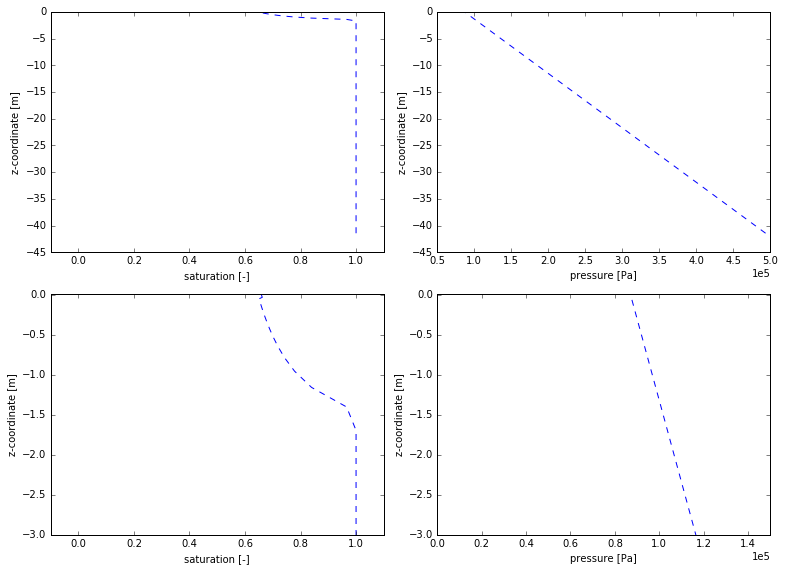

In [24]:
def plot(directory, axs, style):
    dati = column_data.column_data(["pressure", "saturation_liquid"],
                              keys=1, directory=directory)
    z = dati[0,0,:]
    axs[0,1].plot(dati[1,0,:],z, style)
    axs[0,0].plot(dati[2,0,:],z, style)
    # zoom in
    axs[1,1].plot(dati[1,0,:],z, style)
    axs[1,0].plot(dati[2,0,:],z, style)

fig, axs = plt.subplots(2,2, figsize=(11,8))
dii = "test0/test0.regression"
plot(dii, axs, 'b--')

axs[0,0].set_xlim([-.1,1.1])
axs[0,0].set_xlabel('saturation [-]')
axs[0,0].set_ylabel('z-coordinate [m]')
axs[0,1].set_xlabel('pressure [Pa]')
axs[0,1].set_ylabel('z-coordinate [m]')
axs[0,1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

axs[1,0].set_ylim([-3,0])
axs[1,1].set_ylim([-3,0])
axs[1,0].set_xlim([-.1,1.1])
axs[1,1].set_xlim([0.5,1.5e5])
axs[1,0].set_xlabel('saturation [-]')
axs[1,0].set_ylabel('z-coordinate [m]')
axs[1,1].set_xlabel('pressure [Pa]')
axs[1,1].set_ylabel('z-coordinate [m]')
axs[1,1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.tight_layout()
plt.show()

#### test2: Freeze steady-state to generate ice column


NOTE: From here on, transient problems are plotted such that early times have low saturation, and late times are high saturation.

In [100]:
# plot the solution

def plot(directory, axs, style):
    # load the data
    dati = column_data.column_data(["pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"],
                                    directory=directory)
    keys, times, dat = parse_xmf.readATS(directory=directory)

    ice = colors.cm_mapper(-10000, times[-1], colors.ice_cmap())
    water = colors.cm_mapper(-10000, times[-1], colors.water_cmap())
    gas = colors.cm_mapper(-10000, times[-1], colors.gas_cmap())    
    
    # plot saturation of liquid, pressure
    z = dati[0,0,:]; tt=np.linspace(times[0],times[-1], num=15) #[times[0],times[-1],times[-1]]
    
    bool=1
    if bool:
        for i,t in enumerate(tt):
            axs[2].plot(dati[5,i,:]- 273.15,z, style, color=gas(t))
            axs[1].plot(dati[1,i,:],z, style, color=water(t))
            axs[0].plot(dati[2,i,:],z, style, color=water(t)) #dark blue
            axs[0].plot(dati[3,i,:],z, style, color=ice(t)) #light blue
            axs[0].plot(dati[4,i,:],z, style, color=gas(t)) #dark red
    else:
        id_max=np.argmax(dati[5,:,-1])+1
        id_min=np.argmin(dati[5,:,-1])
        axs[2].plot(dati[5,id_max,:]- 273.15,z, style, color=gas(1))
        axs[1].plot(dati[1,id_max,:],z, style, color=water(1))
        axs[0].plot(dati[2,id_max,:],z, style, color=water(1)) #dark blue
        axs[0].plot(dati[3,id_max,:],z, style, color=ice(1)) #light blue
        axs[0].plot(dati[4,id_max,:],z, style, color=gas(1)) #dark red
        
        axs[2].plot(dati[5,id_min,:]- 273.15,z, style, color=gas(1))
        axs[1].plot(dati[1,id_min,:],z, style, color=water(1))
        axs[0].plot(dati[2,id_min,:],z, style, color=water(1)) #dark blue
        axs[0].plot(dati[3,id_min,:],z, style, color=ice(1)) #light blue
        axs[0].plot(dati[4,id_min,:],z, style, color=gas(1)) #dark red

    axs[1].plot(0*np.ones(z.shape), z, 'k--')
    #axs[1].plot(101325*np.ones(z.shape), z, 'k--')
    
def test2(diii):
    fig, axs = column_data.getFigs(False, True)
    #diii = "test2/3c.regression"

    dati = column_data.column_data(["pressure", "saturation_liquid", 
                                        "saturation_ice", "saturation_gas", "temperature"],
                                        directory=diii)
    depth = dati[0,0,:]
    print depth[0], dati[1,0,0], depth[-1],'surface pressure t=0:',dati[1,0,-1]
    print depth[0], dati[1,-1,0], depth[-1],'surface pressure t=N:',dati[1,-1,-1]
    print depth[0], dati[5,-1,0], depth[-1],'surface temp t=N:',dati[5,-1,-1]



    plot(diii, axs, '-')

    axs[0].set_xlim([-.1,1.1])
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('pressure [Pa]')
    axs[2].set_xlabel('temperature [C]')
    axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    # and the zoomed version
    fig, axs = column_data.getFigs(False, True)

    plot(diii, axs, '-')

    axs[0].set_xlim([-.1,1.1])
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('pressure [Pa]')
    axs[2].set_xlabel('temperature [K]')
    axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    axs[0].set_ylim([-5,-0])
    axs[1].set_ylim([-5,-0])
    axs[2].set_ylim([-5,-0])

    plt.show()

-41.4474155964 493481.517062 -0.006 surface pressure t=0: 87068.139173
-41.4474155964 503480.763993 -0.006 surface pressure t=N: -81189.2615768
-41.4474155964 276.455908953 -0.006 surface temp t=N: 270.151013384


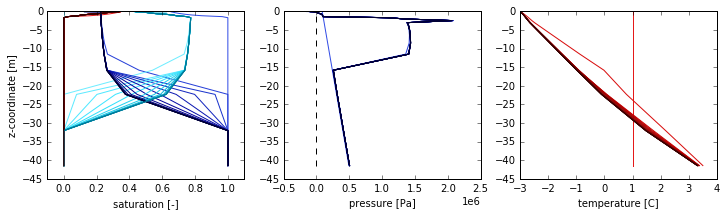

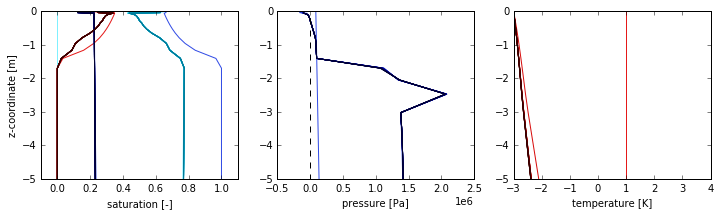

In [103]:
test2("test2/4c.regression")

-41.4474155964 493481.517062 -0.006 surface pressure t=0: 87068.139173
-41.4474155964 503481.274532 -0.006 surface pressure t=N: -81308.5782914
-41.4474155964 273.713080289 -0.006 surface temp t=N: 270.15063795


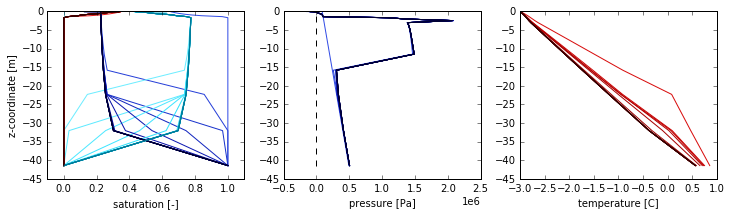

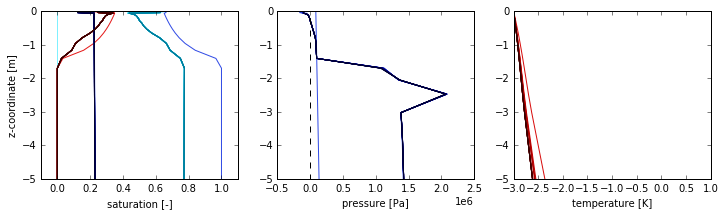

In [102]:
test2("test2/1c.regression")

In [84]:
# plot the solution
def plot(directory, axs, style, timing):
    # load the data
    dati = column_data.column_data(["pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"],
                                    directory=directory)
    keys, times, dat = parse_xmf.readATS(directory=directory)
    skeys, stimes, sdat = parse_xmf.readATS(directory=directory, base="visdump_surface_data.h5")
    
    # convert times to days
    times = [time*365.25 for time in times]

    ice = colors.cm_mapper(-1, times[-1], colors.ice_cmap())
    water = colors.cm_mapper(-1, times[-1], colors.water_cmap())
    gas = colors.cm_mapper(-1, times[-1], colors.gas_cmap())    
    
    print "mapping colorbars:", -1, times[-1]
    
    # plot saturation of liquid, pressure
    z = dati[0,0,:]
    for i,t in enumerate(times):
        if timing(t)%100:
            axs[1].plot(dati[5,i,:],z, style, color=gas(t))
            axs[2].plot(dati[1,i,:],z, style, color=water(t))
            axs[0].plot(dati[2,i,:],z, style, color=water(t))
            axs[0].plot(dati[3,i,:],z, style, color=ice(t))
            axs[0].plot(dati[4,i,:],z, style, color=gas(t))
    axs[1].plot(273.15*np.ones(z.shape), z, 'k--')
    axs[2].plot(101325*np.ones(z.shape), z, 'k--')
        
    # inset -- plot surface water
    pd = parse_xmf.getSurfaceData(keys, sdat, 'ponded_depth.cell.0')
    axs[3].plot(times, pd, 'b')
    if pd.max() > 0:
        axs[3].set_ylim([-.1*pd.max(), pd.max()])

    # plot snow
    snow = parse_xmf.getSurfaceData(keys, sdat, 'snow_depth.cell.0')
    snow = snow + pd
    axs[3].plot(times, snow, 'c')
    if snow.max() > 0:
        axs[3].set_ylim([-.1*snow.max(), snow.max()])
        
    # plot surface temp
    surf_T = parse_xmf.getSurfaceData(keys, sdat, "surface-temperature.cell.0")
    axs[4].plot(times, surf_T, 'r')
    
    # plot snow temp
    snow_T = parse_xmf.getSurfaceData(keys, sdat, 'snow_temperature.cell.0')
    snow_T[0] = np.nan # this is initially zero which screws up the plot
    axs[4].plot(times, snow_T, 'm')

    # plot air temp
    air_T = parse_xmf.getSurfaceData(keys, sdat, "air_temperature.cell.0")
    axs[4].plot(times, air_T, 'Brown')

def go(diii, timing):
    fig, axs = plt.subplots(1,4, figsize=(12,3))
    twinax = axs[3].twinx()
    axs = list(axs)

    axs.append(twinax)

    plot(diii, axs, '-', timing)

    axs[0].set_xlim([-.1,1.1])
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('temperature [K]')
    axs[1].set_xlim(260.,280.)
    axs[2].set_xlabel('pressure [Pa]')
    axs[3].set_xlabel('time [d]')
    axs[3].set_ylabel('ponded (b) and snow (c) depth [m]')
    axs[4].set_ylabel('surface (r), snow (m), air (br) T [K]')
    axs[1].set_title(diii)

    plt.tight_layout()
    plt.show()
            
    
    # zoom
    fig, axs = plt.subplots(1,4, figsize=(12,3))
    twinax = axs[3].twinx()
    axs = list(axs)
    axs.append(twinax)

    plot(diii, axs, '-', timing)

    axs[0].set_xlim([-.1,1.1])
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('temperature [K]')
    axs[1].set_xlim(260.,280.)
    axs[2].set_xlabel('pressure [Pa]')
    axs[3].set_xlabel('time [d]')
    axs[3].set_ylabel('ponded depth [m]')
    axs[4].set_ylabel('surface (r) and snow (m) T [K]')
    axs[1].set_title(diii)

    axs[0].set_ylim([-5,-0])
    axs[1].set_ylim([-5,-0])
    axs[2].set_ylim([-5,-0])

    plt.tight_layout()
    plt.show()
    
    
def month(i):
    def timing(d):
        doy = d/365.0
        month = doy / 30.
        if np.floor(month) == i:
            return True
        else:
            return False
    return timing
def year(yr):
    def timing(d):
        return 365.*yr <= d < 365.*(yr+1)
    return timing
def all():
    def timing(m):
        return True
    return timing

In [108]:
ls test8/1c.regression

checkpoint00000.h5                visdump_mesh.VisIt.xmf
checkpoint01118.h5                visdump_mesh.h5
checkpoint02227.h5                visdump_mesh.h5.0.xmf
checkpoint03515.h5                visdump_surface_data.VisIt.xmf
checkpoint04893.h5                visdump_surface_data.h5
dependency_graph.txt              visdump_surface_data.h5.0.xmf
test.out                          visdump_surface_data.h5.1056.xmf
visdump_data.VisIt.xmf            visdump_surface_data.h5.106.xmf
visdump_data.h5                   visdump_surface_data.h5.1087.xmf
visdump_data.h5.0.xmf             visdump_surface_data.h5.1118.xmf
visdump_data.h5.1056.xmf          visdump_surface_data.h5.1149.xmf
visdump_data.h5.106.xmf           visdump_surface_data.h5.1180.xmf
visdump_data.h5.1087.xmf          visdump_surface_data.h5.1212.xmf
visdump_data.h5.1118.xmf          visdump_surface_data.h5.1243.xmf
visdump_data.h5.1149.xmf          visdump_surface_data.h5.138.xmf
visdump_data.h5.1180.xmf          visdump_surface

TypeError: plot() takes exactly 3 arguments (4 given)

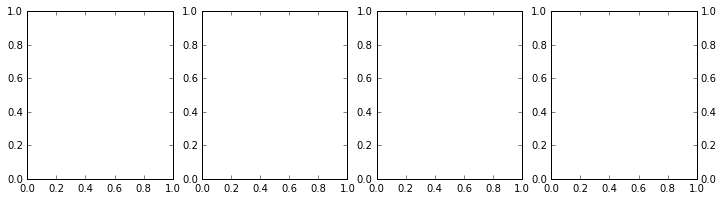

In [107]:
go("test8/1c.regression", month(1))

mapping colorbars: -1 2798.33333333


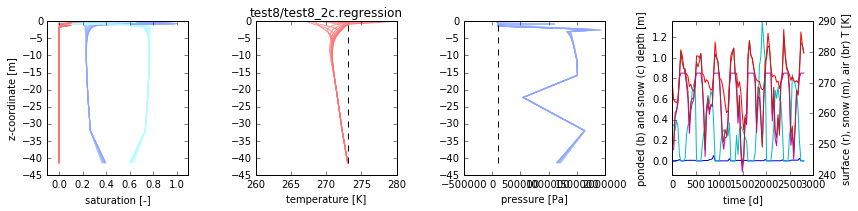

mapping colorbars: -1 2798.33333333


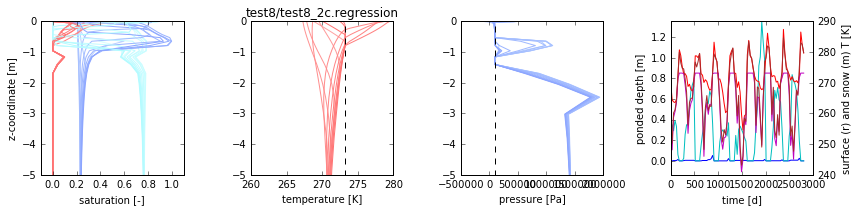

In [86]:
go("test8/test8_2c.regression", year(1))

mapping colorbars: -1 365.0


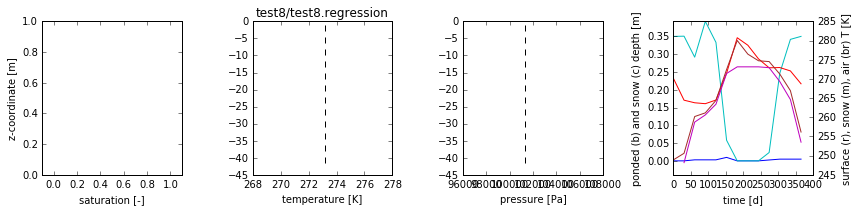

mapping colorbars: -1 365.0


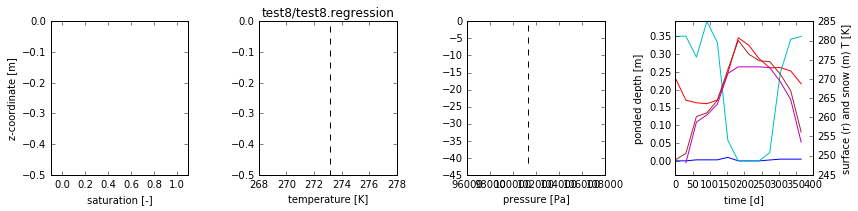

In [57]:
go("test8/test8.regression",month(1))